In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


[*********************100%%**********************]  5 of 5 completed


,Coefficients
AKH.OL,-0.027482
AkerBP,0.536328
PGS,0.050001
VAR.OL,0.277854


Intercept for the best lambda: -0.002179371705193587
MSE for the best lambda: 0.19867988812370369


,Coefficients
AKH.OL,-0.027482
AkerBP,0.536328
PGS,0.050001
VAR.OL,0.277854


Intercept for the best lambda: -0.002179371705193587
MSE for the best lambda: 0.19867988812370369


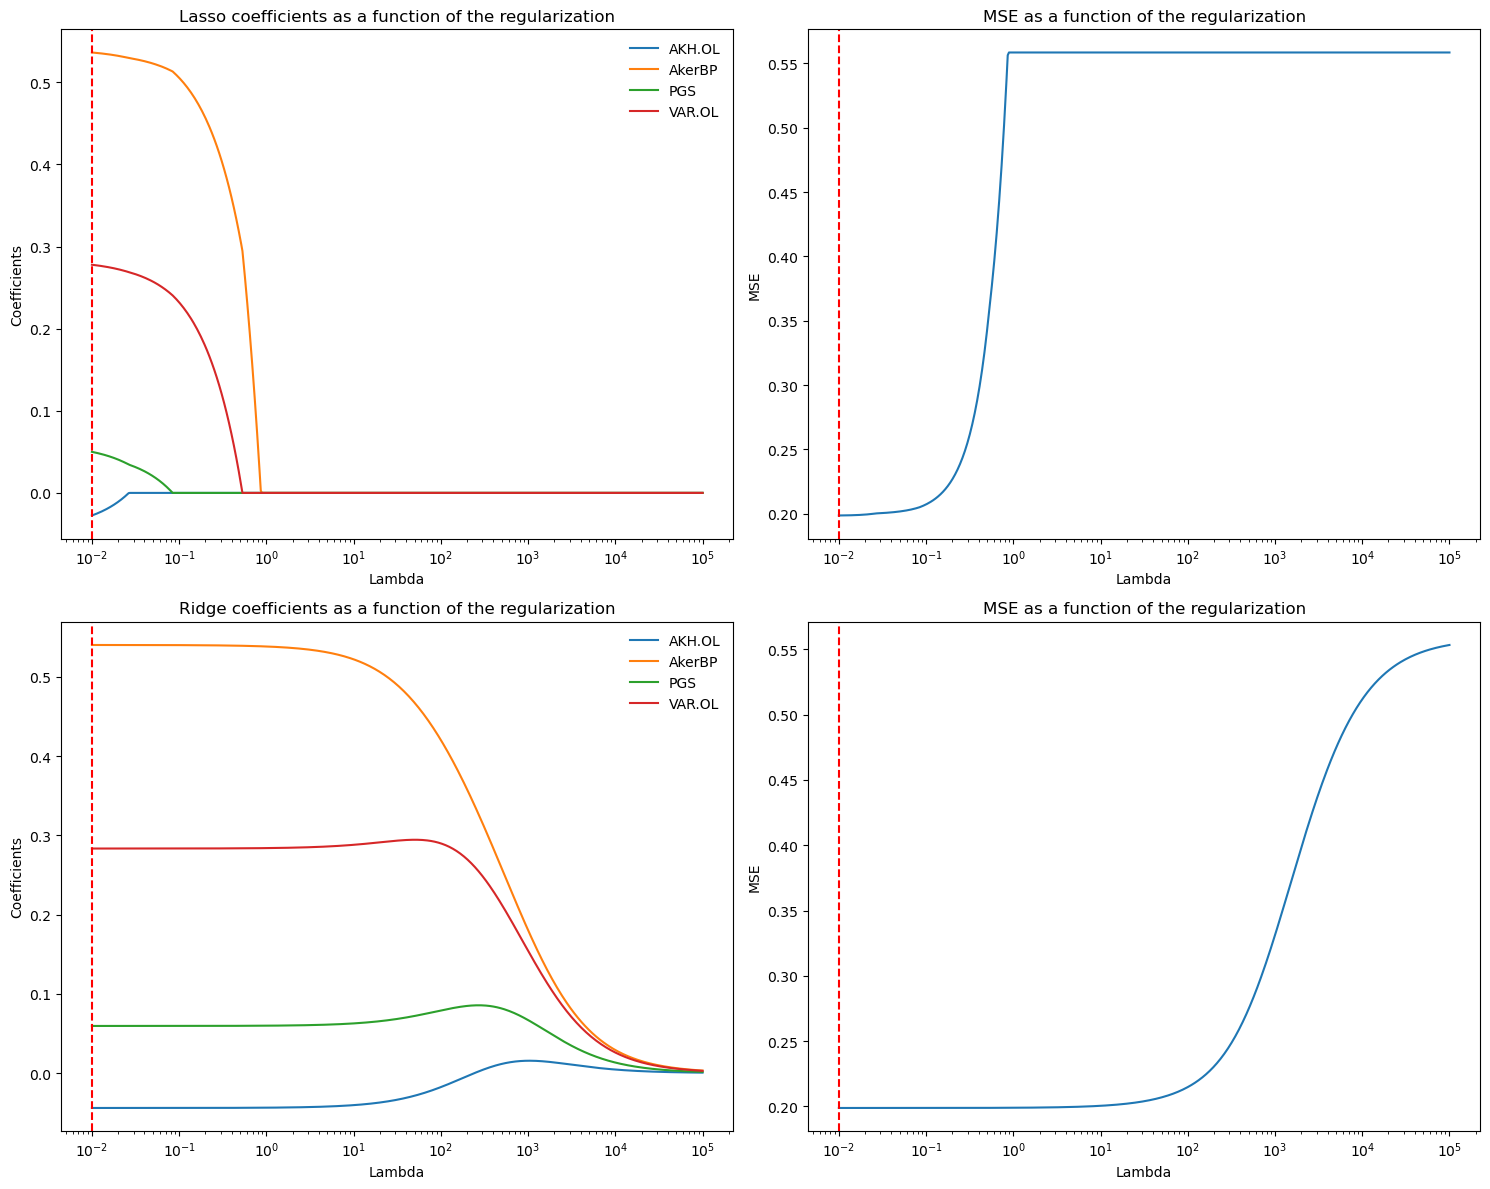

In [34]:
tickers = ['EQNR.OL', 'VAR.OL', 'AKRBP.OL', 'AKH.OL', 'PGS.OL']

df = yf.download(tickers, period='5Y')['Adj Close'].dropna()

df = np.log(df).diff().dropna()

df = df.rename(columns={'EQNR.OL': 'Equinor', 'BZ=F': 'Brent', 'DNB.OL': 'DNB', 'AKRBP.OL': 'AkerBP', 'STB.OL': 'Storebrand', 'TEL.OL': 'Telenor', 'TGS.OL': 'TGS', 'PGS.OL': 'PGS'})

# do a lasso regression
X = df.drop(columns=['Equinor'])
y = df['Equinor']

# scale data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lamdas = np.logspace(-2, 5, 500)

coefs_lasso = []
CV_MSE_lasso = []

coefs_ridge = []
CV_MSE_ridge = []

for i in lamdas:
    lasso = Lasso(alpha=i, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    CV_MSE_lasso.append(mean_squared_error(y_test, lasso.predict(X_test)))

    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    CV_MSE_ridge.append(mean_squared_error(y_test, ridge.predict(X_test)))


fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].plot(lamdas, coefs_lasso)
axs[0, 0].set_xscale('log')
axs[0, 0].set_xlabel('Lambda')
axs[0, 0].set_ylabel('Coefficients')
axs[0, 0].legend(X.columns, frameon=False)
axs[0, 0].set_title('Lasso coefficients as a function of the regularization')
axs[0, 0].axvline(lamdas[np.argmin(CV_MSE_lasso)], color='red', linestyle='--', label='Lambda with lowest MSE')

axs[0, 1].plot(lamdas, CV_MSE_lasso)
axs[0, 1].set_xscale('log')
axs[0, 1].set_xlabel('Lambda')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].set_title('MSE as a function of the regularization')
axs[0, 1].axvline(lamdas[np.argmin(CV_MSE_lasso)], color='red', linestyle='--', label='Lambda with lowest MSE')

# get coefficients for the best lambda
lasso = Lasso(alpha=lamdas[np.argmin(CV_MSE_lasso)], max_iter=10000)
lasso.fit(X_train, y_train)
display(pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficients']))
print('Intercept for the best lambda:', lasso.intercept_)
print('MSE for the best lambda:', mean_squared_error(y_test, lasso.predict(X_test)))

axs[1, 0].plot(lamdas, coefs_ridge)
axs[1, 0].set_xscale('log')
axs[1, 0].set_xlabel('Lambda')
axs[1, 0].set_ylabel('Coefficients')
axs[1, 0].legend(X.columns, frameon=False)
axs[1, 0].set_title('Ridge coefficients as a function of the regularization')
axs[1, 0].axvline(lamdas[np.argmin(CV_MSE_ridge)], color='red', linestyle='--', label='Lambda with lowest MSE')

axs[1, 1].plot(lamdas, CV_MSE_ridge)
axs[1, 1].set_xscale('log')
axs[1, 1].set_xlabel('Lambda')
axs[1, 1].set_ylabel('MSE')
axs[1, 1].set_title('MSE as a function of the regularization')
axs[1, 1].axvline(lamdas[np.argmin(CV_MSE_ridge)], color='red', linestyle='--', label='Lambda with lowest MSE')

# get coefficients for the best lambda
ridge = Lasso(alpha=lamdas[np.argmin(CV_MSE_ridge)], max_iter=10000)
ridge.fit(X_train, y_train)
display(pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficients']))
print('Intercept for the best lambda:', ridge.intercept_)
print('MSE for the best lambda:', mean_squared_error(y_test, ridge.predict(X_test)))

fig.tight_layout()
